In [1]:
:ext QuasiQuotes
import qualified H.Prelude as H
H.initialize H.defaultConfig
[r| require("ggplot2") |]

Loading required package: ggplot2
0x00007f393400a200

## Small Dataset for Ringo

### Haskell / R Logistics First

Testing R Globals .. Must use <<- for assignment

In [2]:
[rprint|y<<-3; 0|]

[1] 0

In [3]:
[rprint| y|]

[1] 3

This works !  The '0' is so the value of 'y' doesn't print as this may be problematic for large printouts.

First let's test getting R results into Haskell

In [4]:
get_normals :: Double -> H.R s [Double]
get_normals n = do
   H.dynSEXP <$> [r| rnorm(n_hs) |]
result <- H.runRegion $ get_normals 4

In [5]:
result

[-0.3465267137150862,-0.5142776987826775,-8.188609132274059e-2,-1.6941856238645805]

Now do an R function ...

In [6]:
[r| fahrenheit_to_celsius <<- function(temp_F) {
   temp_C <- (temp_F - 32) * 5 / 9
   return(temp_C) } |]

0x00007f39361d62d0

And test it ..

In [7]:
[rprint| fahrenheit_to_celsius(98.6) |]

[1] 37

### Ringo Data Exploration

#### Now let's read in the dataset ..

In [8]:
[rprint| dset_small <<- read.table ("TM30-CES99.csv", header=TRUE, sep=",");
     |]

        fp0      fp1      fp2      fp3      fp4      fp5      fp6      fp7
1  16.93446 21.83035 24.64847 17.22998 29.86766 23.29893 36.21929 52.72085
2   9.71750  6.75260  8.94604  9.72321  8.65098  7.36825 20.13315 15.49065
3   1.82220  1.90120  2.23659  1.86512  2.74993  2.33337  3.69341  4.52031
4  10.27356 10.89583 11.58620 10.27655 13.33066  9.34798 22.24663 26.38608
5   6.50525  3.35570  3.65851  6.49614  4.06732  2.81869 12.89792  7.91331
6   4.81356  5.07652  5.12844  4.86420  6.63191  4.68535 10.45052 12.43096
7   4.81958  2.29321  2.27399  4.85271  3.07316  2.19343  9.34648  5.46505
8   4.32009  2.42861  2.34503  4.36334  3.32662  2.36727  8.37438  5.86644
9   1.23086  1.89535  1.98516  1.28237  2.82172  2.17618  2.64693  4.67328
10 15.14046  9.88862  7.44843 15.26593 12.54852  7.26781 32.78493 24.82972
11  8.07314  4.46510  2.96452  8.08658  5.13241  2.45169 17.63627 11.25718
12 10.67617  5.76283  3.61085 10.69819  6.62404  3.00086 22.91012 14.59226
13  3.93965  3.14704  2.0

#### Let's do a quick PCA

In [9]:
[rprint| dset_pca <<-prcomp (dset_small[c(1:15)], center=TRUE, scale=TRUE) |]

Standard deviations (1, .., p=15):
 [1] 3.497108e+00 1.517478e+00 6.733766e-01 1.065702e-01 4.741367e-02
 [6] 1.824746e-02 9.159435e-03 4.877200e-03 3.562465e-03 1.035096e-03
[11] 6.332675e-04 6.777833e-05 3.408059e-05 3.087402e-05 8.541166e-06

Rotation (n x k) = (15 x 15):
            PC1         PC2         PC3          PC4         PC5          PC6
fp0  -0.2532041  0.29198874 -0.20781706 -0.003172487  0.03279063  0.088152978
fp1  -0.2797700 -0.02972777  0.29853504  0.150437445  0.15660560 -0.005469843
fp2  -0.2337677 -0.34279938 -0.35963395  0.453094150  0.15122788  0.241830008
fp3  -0.2567914  0.28053333 -0.16348974 -0.130866235 -0.01020166  0.082529601
fp4  -0.2757387 -0.08881107  0.33302485 -0.380090805  0.05054910  0.372621255
fp5  -0.2496639 -0.31700406 -0.06752749 -0.583183663 -0.37104147 -0.347549465
fp6  -0.2521173  0.30567853 -0.12497577  0.084513091 -0.36232872  0.169781830
fp7  -0.2752094  0.01517451  0.40128695  0.086752334  0.18524240  0.103704839
fp8  -0.2573173 -0.285

#### Inspect the results

In [10]:
[rprint| summary(dset_pca) |]

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6      PC7
Standard deviation     3.4971 1.5175 0.67338 0.10657 0.04741 0.01825 0.009159
Proportion of Variance 0.8153 0.1535 0.03023 0.00076 0.00015 0.00002 0.000010
Cumulative Proportion  0.8153 0.9688 0.99906 0.99982 0.99997 0.99999 1.000000
                            PC8      PC9     PC10      PC11      PC12      PC13
Standard deviation     0.004877 0.003562 0.001035 0.0006333 6.778e-05 3.408e-05
Proportion of Variance 0.000000 0.000000 0.000000 0.0000000 0.000e+00 0.000e+00
Cumulative Proportion  1.000000 1.000000 1.000000 1.0000000 1.000e+00 1.000e+00
                            PC14      PC15
Standard deviation     3.087e-05 8.541e-06
Proportion of Variance 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00

In [11]:
[r| str (dset_pca) |]

List of 5
 $ sdev    : num [1:15] 3.4971 1.5175 0.6734 0.1066 0.0474 ...
 $ rotation: num [1:15, 1:15] -0.253 -0.28 -0.234 -0.257 -0.276 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:15] "fp0" "fp1" "fp2" "fp3" ...
  .. ..$ : chr [1:15] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:15] 7.43 11.68 11.03 7.71 16.71 ...
  ..- attr(*, "names")= chr [1:15] "fp0" "fp1" "fp2" "fp3" ...
 $ scale   : Named num [1:15] 4.9 7.74 8.01 5.04 11.09 ...
  ..- attr(*, "names")= chr [1:15] "fp0" "fp1" "fp2" "fp3" ...
 $ x       : num [1:99, 1:15] -6.017 0.812 4.559 -0.417 2.939 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:15] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"
0x00007f39340082e0

#### Inspect the X's

In [12]:
[rprint| dset_pca$x |]

               PC1         PC2          PC3          PC4           PC5
  [1,] -6.01667020  0.54194176 -1.217431115  0.075265850 -1.793627e-02
  [2,]  0.81168533  1.42522522 -1.217988941 -0.058525767  2.549894e-02
  [3,]  4.55910586  0.06066636  0.039277455  0.012226631 -2.777270e-04
  [4,] -0.41679493  1.11755005 -0.704373398  0.225815931 -4.365102e-02
  [5,]  2.93885644  1.37077918 -0.729049792 -0.095356214  1.370422e-01
  [6,]  2.81355323  0.50685550 -0.188052242  0.063337868 -1.659036e-02
  [7,]  3.71380128  1.02187473 -0.476736351 -0.122724761  1.007769e-01
  [8,]  3.79478102  0.84393434 -0.366510618 -0.108913516  1.104235e-01
  [9,]  4.73815076 -0.08983721  0.188406057  0.040550799 -2.455672e-02
 [10,] -1.17812980  3.36089484 -1.421546237 -0.160282802 -9.528921e-02
 [11,]  2.33755514  2.01483085 -0.675479356 -0.007114197 -7.752691e-02
 [12,]  1.33410751  2.71907494 -0.988385701 -0.069653079 -3.571515e-02
 [13,]  3.74850100  0.73834238 -0.092164784 -0.054077004  1.484191e-02
 [14,]

#### Plot PC1 vs PC2


<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC5VBMVEUAAAACAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERETExMUFBQVFRUWFhYXFxcZGRkaGhobGxscHBwdHR0eHh4hISEiIiIkJCQlJSUmJiYnJycpKSkqKiorKystLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozu7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///+Ctq/wAAAgAElEQVR4nO2deVwUV57AmTs75849O7M7u7OTnZ3d2Z3MjjTQNA2IgCOIohFFbbw1eCtqHOMBmsMDbzziHcArQSUixICKogGNERAv5Kb7GY8oHqj191ah0Fcdr+pXfVT17/v5+Oh69frHs7901XtVr94LYhBdE+TrCiCeBQXrHBSsc1CwztGp4NFBQV/7p2Gt7Ku7c3//nZ8Eb33CnIz/ddAc+W/bGPbjH/zlIy9U2UPoVfC/1lbn/uKvDGP73Y+Xl1Vu/M9C5uNZuT+VFOz+NsP8I6UpXyvySq09gV4Fv8oma4OszJDvNXDbnV9y6a96BG/8QQebZv3yGVP8v//w/T+Wib6Nef4vo7xYd3XRs+BtQY0Pv5PukGsXfOeV3Wz66gzm0ffmNTV8eE70bcyzX8/1eI09hX4FP6/5j98ydUGbHXLtgpnkaIapDLrEtAadknwbs/CHDR6ur+fQq+Cgr38t6E8XmMtCggu/3sak/4l98fq3opZeEX/b6u8We77GnkKvgn/7Rc0d9ufD70x2yHUQ/PSX73T+fCX36vxS0zd2iL1t0fdLPV5fz6FXwa++fPH695q4H09dGlkMM/0Ph79pe/l6qFHkbVP/8Yyna+tJ9C7Y+tufrjhRmcP2dx6cP/8zy/na7hKXgv4Yz/6onnOm+czvJgq/bcy33j9//vx1b1ZeVfQumLmd8e/f+XHwtk7mdBDH73qK/CloL5s2xP7iW78a/0D4bT/seluU12quNjoVjHSDgnUOCtY5KFjnoGCdg4J1DgrWOShY56BgnUMh+EvCz637AjuU0nlH5YAPVI735K7KATtUjvf4K4eNByhYLigYBgqGgoJhoGAYKBgKCoaBgmGgYCgoGIa+BD8asREFO6MvwTuzULALuhLctqQYBbugK8GZzV2Cj69a1dohwBOhHQp59kjlgKpX8LHKATtVjvfUsYKPRAVXbmJQsCt6Erw7deTgAXvwEO2Erg7RDIPnYFdQMAwUDEVPFzoujY6cfE2iDArWruCGkGPW/RFW8UIoWLuCP8hkkwll4oVQsHYFv7+cTaYfEy+EgrUruM5YRy6EtIgXQsHaFUyKY0z9KiTKoGANC6YBBaNgWaBgGCgYCgqGgYJhoGAoKBgGCoaBgqGgYBgoGAYKhoKCYaBgGCgYCgqGgYJhoGAoKBgGCoaBgqH4tWDbuoSE/apGRMF+JTgz/V594j5VQ6JgfxIcYeu8c7W/qiFRsD8JNrPn4MY4VUOiYH8SPHlt55eT16kaEgX7k+CW9KiILFUjomC/EuzTblJtA00pFAzDZ4KrjMm9LRKPwXCgYBjeFnxpQET4Nu5FXBUhS1dKx0PBMLwtuHcZaUn8hHANePYgnSwdDwXD8LLgG/3Y5EgGmxjb2ReTpeOhYBheFtwSwyZ5i9hkY2LBtl6XpOOhYBjePkSnrmguC7nIvTo+Z+lVingoGIa3BbdmxlrOyYmHgmHg7UIoKBgGCoaBgqGgYBgoGAYKhoKCYaBgGCgYCgqGgYJhoGAoKBgGCoaBgqGgYBgoGAYKhoKCYaBgGCgYijLBQkt8PPT7VVfUXtRET6uuePobvLnvwEOuefgNhuI/h+i3x9+ojv/QJRMFQ/EfwRE2QuqSXDJRMBT/EcyNRHZ7lBAFQ/EfwRO3ENvM1S6ZKBiK/whuHhthXOiaiYKh+I9gXlAwFBQMAwXDQMFQUDAMFAwDBUPRpuATS9Y3KwvoO8HXD0gsq/iCgBN8rdh9xdg1ibkrQ24oCugzwQfDFqQltkuXCzTBK81TI991zQ2xErLDrc9Mhc8EhzYR8l62dLkAE3wznk3iLzhntvRhk4pRigL6SnBTLJucHiNdMMAEFyxjk2W7XHJNdYS8laMooLcEHx4zqdwpg1sWdc170gEDTHB1KpuknnTJLTWkxVlsigJ6SfCWAaePm5yWMt4VuXJ6b4m1bzkCTHDnmPHbx6e5ZbdXXFEY0EuCza3sH+dAp6zqrQU0f5OBJvhO4XuFagb0kuAI9l9rjJKAASdY5YAeFbw10jTrxVHYcoBtMy9REhAFw/Ck4L2DW8ia8V0vbyabw8dRzIToDgqG4UnBKdz8S+aXG+3KGoEoGIgnBady/fUIYEAUDMOTggsSG2xvU0x/KAoKhuHRRlZu78i32oABUTAMvF2IgmWBgmGgYCgoGAYKhoGCoaBgGCgYBgqGgoJhoGAYKBgKCoaBgmGgYCgoGAYKhoGCoaBgGI9qmtQNiIJhqCy4KGx4RIaqEVEwDJUFB9+6S8YfVDMiCoahruDqwew5+IiqX2EUDENdwa1GVvBqikfK6EHBMFQ+RM8fW7jCqGozCwXDULsVXbpgLcUDRzJAwTCwH4yCZYGCYfiP4Kp83vXAUTAMvxE8fcCi2GU8+SgYhr8ILhvGJjGX3XeoKLi9q7XmQ8HtGcPGVgao4I1r2GTeR+47VBPcbjH1TrjuU8Ftl5mGlOeBKfgTbpaB+Gr3HaoJXphNyOHhPj9Ep3QEpmAydkT2wDd58lUTHMMdoCN8Lfj8DDZZbjTWP/cSjLd+kSSf59XxZatWweGNz58/6qNWNDtOFXwiIdg2tolNbzc33/qSn9sPBHYo5ek9lQN2qByv8yuVApUZi04k7Pzyy4cqxevmyX2HjQ5xwfcnXXj5KvAO0UKo14o+N3USN++SDw/RnRklDAp2QU/94HN9U1NTrSjYCT0JdgAFd4OCYaBgKCgYBgqGgYKhoGAYKBgGCoaCgmGgYBgoGAoKhoGCYaBgKCgYBgqGgYKhoGAYKBgGCoaCgmGgYBgoGAoKhoGCYaBgKCgYBgqGgYKhoGAYKBgGCoaCgmGgYHfqpiQsbKasnoYFt7YrCqh9wQ2Ggus58ZTV06zgG4nRJosSxdoXvP0dNhlWRVc9zQoeWUBI9lsKAmpf8JocNplU
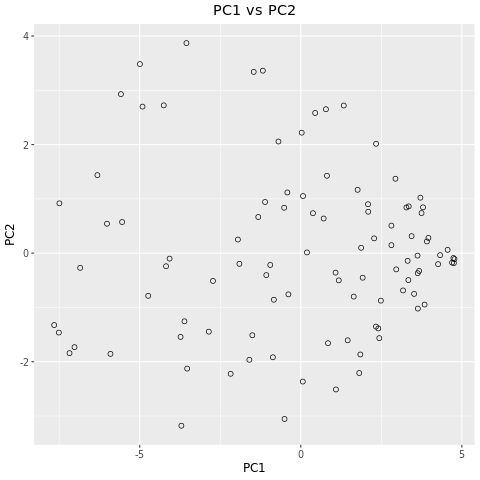

In [13]:
[rgraph|
  ggplot(dset_small, aes(x=dset_pca$x[,1], y=dset_pca$x[,2])) + 
  ggtitle("PC1 vs PC2") +
  xlab("PC1") + ylab("PC2") +
  geom_point(size=2, shape=21) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(text=element_text(family="Ariel", size=12)) |]

#### Test understanding if row vector of samples times PC1 vector yields x value ..

In [14]:
[rprint| as.data.frame(dset_pca$rotation[,1:2])
 0|]

[1] 0

In [15]:
[r| pc1 <<- dset_pca$rotation[,1]
    pc2 <<- dset_pca$rotation[,2]
    dataline <<- dset_small[1,] |]

0x00007f38f9215660

In [16]:
[rprint| dataline |]

       fp0      fp1      fp2      fp3      fp4      fp5      fp6      fp7
1 16.93446 21.83035 24.64847 17.22998 29.86766 23.29893 36.21929 52.72085
       fp8      fp9     fp10     fp11     fp12     fp13     fp14        X
1 19.77298 40.67645 31.58421 13.00247 33.25382 21.61335 12.59739 74.79439
         Y        Z
1 64.76476 64.86676

#### Answer for conversion of first two cols should be<br>
-6.01667020  0.54194176 

In [17]:
[rprint| # project new data onto the PCA space
         scale((dataline[1,1:15]), dset_pca$center, dset_pca$scale) %*% dset_pca$rotation |]

       PC1       PC2       PC3        PC4         PC5        PC6         PC7
1 -6.01667 0.5419418 -1.217431 0.07526585 -0.01793627 0.02732845 0.006937342
          PC8           PC9       PC10         PC11          PC12          PC13
1 0.003540254 -0.0008921709 0.00078657 0.0001882905 -1.116724e-06 -5.418156e-06
           PC14         PC15
1 -7.360121e-06 4.675018e-06

#### Works great!<br>
Later need to limit it to the first 3 cols?

In [18]:
[rprint| dim(dataline[1,1:15]) |]

[1]  1 15

In [19]:
[rprint| dim(dset_pca$rotation) |]

[1] 15 15

#### Now Export Data for AI or Monte Carlo

Use ..<br>
write.table(mydata, "c:/mydata.txt", sep="\t")<br>
but first make a data.frame.

In [20]:
[r| x=dset_pca$x[,1] #PC1
    y=dset_pca$x[,2] #PC2
    # dset_small$XScaled = scale((dset_small$X, dset_pca$center, dset_pca$scale)
    dset_small$XScaled = scale(dset_small$X)
    actX=dset_small$XScaled
    exportFrame <<- data.frame(x,y,actX)
    write.csv(exportFrame, "frame.txt", row.names=FALSE) |]

0x00007f39340082e0

In [21]:
[rprint| exportFrame |]

             x           y        actX
1  -6.01667020  0.54194176  1.91722730
2   0.81168533  1.42522522  0.23260496
3   4.55910586  0.06066636 -1.20956200
4  -0.41679493  1.11755005  0.53274115
5   2.93885644  1.37077918 -0.40758297
6   2.81355323  0.50685550 -0.57130696
7   3.71380128  1.02187473 -0.75788250
8   3.79478102  0.84393434 -0.81346742
9   4.73815076 -0.08983721 -1.30273622
10 -1.17812980  3.36089484  1.18267670
11  2.33755514  2.01483085 -0.07728859
12  1.33410751  2.71907494  0.34516248
13  3.74850100  0.73834238 -0.85893738
14 -1.95254190  0.25052890  0.61212317
15 -1.10862152  0.94218313  0.50023070
16  3.35036440  0.86153820 -0.70874320
17  3.27903220  0.84110086 -0.65534474
18  2.09372396  0.76242965 -0.40413144
19  0.02821817  2.21907765  0.54011049
20  0.78062261  2.65139283  0.32381517
21 -3.54956984  3.86948627  1.88229399
22 -1.46113560  3.33903547  1.15469987
23 -7.49300866  0.91730528  2.23224846
24 -5.58392849  2.92951885  2.15196176
25  0.44589011  2.5819508

#### HP Evolutionary Stack Computer Results for X

In [24]:
[rprint| predictedX <<- read.csv(file = 'paste01.csv', header=FALSE) |]

             V1          V2
1   1.967583586  1.91722730
2   0.184061967  0.23260496
3  -1.349531851 -1.20956200
4   0.460303492  0.53274115
5  -0.470423178 -0.40758297
6  -0.692009319 -0.57130696
7  -0.807577964 -0.75788250
8  -0.885254003 -0.81346742
9  -1.448396390 -1.30273622
10  1.361707391  1.18267670
11 -0.096817288 -0.07728859
12  0.415490229  0.34516248
13 -0.903047587 -0.85893738
14  0.660921239  0.61212317
15  0.615241395  0.50023070
16 -0.746647860 -0.70874320
17 -0.731379402 -0.65534474
18 -0.399388294 -0.40413144
19  0.657257843  0.54011049
20  0.561231068  0.32381517
21  2.225716834  1.88229399
22  1.440051321  1.15469987
23  2.523094183  2.23224846
24  2.554034201  2.15196176
25  0.640818223  0.47358627
26  2.542991374  2.05724150
27  0.595546582  0.45258449
28 -1.104526341 -1.02683786
29  2.092765299  1.60232781
30 -0.021590592 -0.12022656
31  2.283934775  1.74259233
32  0.824825397  0.55661999
33  2.325155318  1.88001417
34 -0.179547049 -0.28404900
35 -1.109725727 -1.0

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAADAFBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////isF19AAAgAElEQVR4nO2dB1gUZ/7HuZTL3SUxPf7VXLxcEnN3XhJzKSZKW3YpIlKsWFCioLGgGKNRsWFisMTYEjXG2HvsjTOxEjUiiigIgqBIW3bfJCrSBeY/szvAzrLvlt8pO+/u7/M8vsy8837nfeXz7DA71YVDHBoXew8Aub+gYAcHBTs4jii4f597tqp5r1lendBGvrAkWP1Iy2rD+T79TberN1Ln1amG/xHSocrcWoe5uDzwwqAi0wsFed8uNd9lvWDrumtuWBI8q+e/txnOWxLM5T81k+NW/umy2bUOezXj8tZWnfQzFUYLjT+d5gRb111zw5Dg2r/tnafSTX3b/o/PBt8d4sKzj+sYw9fEtee4va5PtXA9xRluU7c8dPbqY4vFmRUtyvlyduta7vC7f3m8Q4JYPYyPcktdNFzQwOhWz/Mr/+cjL0/nP4TVUU+1+HBG/SZa0mXTNia6kwkMCY5//q764Wx+Iu7Pi7IvzasWP04Ngjduu5o5poVG8kezf7v3fOvE6Vt/3sSX7SdwlY9Nzb+xJ0ms1gle65LHBT0cV17CzWu9M+/oqxM4btLTe3KnPSYKlnbZtI2J7mQCQ4KDoznO/1OOq3p8pr7CSLCOv62RCL75l8ca/7qG+nHceZc0rsjllMFqecF16a+/wnFBr/Nzd5/cwpe7WnB3H13ET7jqBUu7NNHGVHfygB3BRQ9d4Lit/G7WZZfT+hojwfkjOrRu+XCsRPCSPz2wr2Em/kE1F/02P9H/j75zsuprh7k8+IDL2ym8YGF16S56SLZLMj87SS9Y2qWJNqa6kwfsCP7M5UEel238b1v8AOoFfyAI/pwX/LpvQq66fYyh4Iw/L/2kpbZ+rqb1l3dbCp857sIc5UPrxdphr6Sm3xImgobwRZqL+Lc52yWVL6fXCzbs0kQbU93JA2YE17adnMozQMVVt4jVV4XpRAYN5YsB7TmNy1mOK33MUHD1f7pwla8HN6xj/BsHHq7//Q9UiBPD6rfuOsFVLaL1c3cf3SDU6QVLuzTRxmR3soAZwQf+cEP4cewP2fwez8LMi3OruemvZpFq7pvns+t2P9qeq3kmlqsY+JCh4InPqjnu4iOr6teR5tIhkP9xOeZMwZnXosRKqWDuy4di09I38wYnt7vB7fljw06WYZdN25jsThYwIzjwfd2P2tb8btbSfzz8XMhdTq16nP/OUjXquecHTuItHX+z1StzOxoI/vmBncKPuY9fr1/J2y7b+fJGQKs/thlZJtYZCebWvvXIk+8t5T+nUU+9EDyh/muSpMumbUx3JweYEYzAQMEODgp2cFCwg4OCHRwU7OCgYAcHBTs4KNjBsULw7wREaQUsR8qBuaoSWO7XUmCHdb/BcrdvwnI3a2xqXoaC9aBg2HBQMA0UDAMFS0HBIigYNhwUTAMFw0DBUlCwCAqGDQcF00DBMFCwFBQsgoJhw0HBNFAwDBQsBQWLoGDYcFAwDRQMAwVLQcEizAq+PMxnbDa9OQoWYUuwZnH3iETdbJ77T9pdymJqcxQswpbgqJnXTnqcE2a3zeKL0SeozVGwCFOCtSp+4uBEYXbdfL749BBfXBzgPeBik+YoWIQpwUX+/MTPo4TZTM9MkuJeSEi++ylyyr3AuDkKFmFKMAk+QooH7tXNH/FXhpzhf+6bwhdT9xo3R8EibAm+0kfl+Y20fs90vpix27i51YJv/gqirBKW+7UcmKu+A8v9VgbssO53WK7kFix3q8Z0fb77+V/Pu+cbV1stuKwURNVdWK60GpirqYTlyqqAHUJ/M5XlsFx5LWVBal/vfqlNaitwE62HrU209eDfYBEUDBsOCqaBgmGgYCkoWAQFw4aDgmmgYBgoWAoKFkHBsOGgYBooGAYKloKCRVAwbDgomAYKhuGIgiVXXKFgWE6+glMD/Nw+a5xFwbCcfAUHnCYkanPDLAqG5WQrWO3HF4lDG+ZRMCwnJ8GFlw3nFPy/AxMbZlEwLCcjwTGKvu7HG2enjj6/37XxelgUDMvJR/CukYRc9TCo2BQx/lLjHAqG5eQjeGI8X4ReoeVQMCwnH8ELVvCFQk3LoWBYTj6Cc92Xxw+bSs2hYFhOPoJJ3lcTJDconBwTdbhxDgXDcjISbES86khCIB7oqMfxBHfP5L8Z+zbMomBYTr6CfTV8oWqYRcGwnHwFT11OyA/DG2ZRMCwnX8HqIUqfvjcaZlEwLCdfwYQUG34pRsGwnJwFS0DBsBwKhg0HBdNAwTBQsBQULIKCYcNBwTRQMAwGBe9XKFU/Wp1DwbCc/QRnKnJJjsd1a3MoGJazn+BNc4ipB1zRQMGwnP0E75/EF2OOWptDwbCc/QQXeW28skZ3ysgqUDAsZ8edrNwpfWbmWZ1DwbAcfk2CDQcF05CF4OLJg4afR8FmYVqw+gp3I6wOBZuDacECYeUo2BysC74wgS8WKBTX62BwwByU5u7vnndYvTxsSnHT6pu3YR1WWxCsHZ4vbKrT08lNEOVVsNzNSmCuugyWu1UO7LDuNixXWmK6PmxRVrxbrlFlflBIcI8i3eSdWpu6KTcvuHR0ijiFm2gK93gTnRPMF99+bVQbuZ+QbWN0k/d0E3138hEOBZvnHgtOCeeLbV8Y1aoainsrOCkoPDxcg4LNca93sjwvkqLgk0aVAdcIyQzWTeKBDlhONoITu3p5rjGuPKjcvcPziG4SBcNyshFsmqSp05P1UygYlpOb4KMRg3aZXICCYTmZCT7o90tyvxWmlqBgWE5mgntlEqL2NrUEBcNyMhPsX0gM7xk1AAXDcjITPHs2IZtHmFqCgmE5mQnWRHuqBuWbWoKCYblmFbx+wMhEuZxNQsEWAAj+fOTF455JKBgEC4K9+H8JUZYFa9eMmt3k
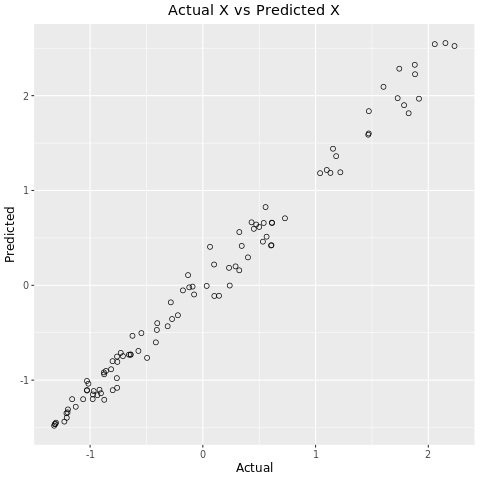

In [30]:
[rgraph|
  ggplot(predictedX, aes(x=predictedX[,2], y=predictedX[,1])) + 
  ggtitle("Actual X vs Predicted X") +
  xlab("Actual") + ylab("Predicted") +
  geom_point(size=2, shape=21) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(text=element_text(family="Ariel", size=12)) |]

#### With This Formuls (Raw)

(program->)
(#<procedure:s-plus> ())
(#<procedure:s-swap-1> ())
(#<procedure:s-times> ())
(#<procedure:s-plus> ())
(#<procedure:s-minus> ())
(#<procedure:s-divide> ())
(#<procedure:s-plus> ())
(#<procedure:s-times> ())
(#<procedure:s-plus> ())
(#<procedure:s-divide> ())
(#<procedure:s-divide> ())
(#<procedure:s-push> (3))
(#<procedure:s-push> (2))
(#<procedure:s-minus> ())
(#<procedure:s-swap-1> ())
(#<procedure:s-push> (1))
(#<procedure:s-push> (0))
(#<procedure:s-pop> ())
(#<procedure:s-divide> ())
(#<procedure:s-times> ())
(#<procedure:s-swap-1> ())
(#<procedure:s-times> ())

To interpret this, it helps to know that,
- push (0) - means put constant 1
- push (1) - means put constant 5
- push (2) - means put constant PC1
- push (3) - means put constant PC2

I'll have to check this to be absolutely sure ..

#### Comments

- Didn't use PC3
- It trained on all the data, no hidden data
- Need to get the 'round trip', i.e.generate model and test on new data
- Try detrending?
- Is it accurate enough .. No way to tell until the data is remapped to actual X from PCA space.
- Need to try Y, and Z

#### Formula from HP Stack Machine

Converting the HP Stack Program resulted in,

<font color='blue'>$Prediction = 0.6 \cdot (P2 - P1)$</font>

Verified below by comparing the two scatterplots (one above).

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAADAFBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////isF19AAAgAElEQVR4nO2dB1gUZ/7HuZTL3SUxPf7VXLxcEnN3XhJzKSZKW3YRRKRYsaBEQYOKYohGxYaJwRJjS9QYY++xN87EStSICBYQBUGRtuy+SVSkg8x/ZneAnWXfLb9Tdt7d3+d5fJl55/3O+8rn2WH6unCIQ+Ni7wEg9xcU7OCgYAfHEQUP6HvPVjX3NcurE9rIF5YEqx9pWW0433eA6Xb1Ruq8OtXyP4I7VJlb63AXlwdeGFxkeqEg79sl5rusF2xdd80NS4Jn9vr3VsN5S4K5/KdmcNyKP10yu9bhr16+tKVVJ/1MhdFC40+nOcHWddfcMCT47t/2zFXppr5t/8dng2qGuvDs5TrG8jXx7Tluj+tTLVxPcobb1M0Pnbn62CJxZnmLcr6c1foud+jdvzzeIVGsHs5HuSUuGi5wUHSr5/mV//ORl6fxH8LqqKdafDi9fhMt6bJpGxPdyQSGBCc8X6N+OJufiP/zwuyLc6vFj1OD4A1br2aOaaGR/NEc0O49nzpx+tafN/Jl+/Fc5WNT8m/sThardYLXuORxgQ/Hl5dwc1vvyDvy6niOm/j07typj4mCpV02bWOiO5nAkOCgaI7z+5Tjqh6foa8wEqzjb6slgm/+5bHGv64hvhyX4pLOFbmcNFgtL7gu4/VXOC7wdX6u5snNfLmzBVfz6EJ+wlUvWNqliTamupMH7Agueugcx23hd7MuuZzS1xgJzh/RoXXLh+Mkghf/6YG9DTMJD6q56Lf5iQF/9JmdVV873OXBB1zePs8LFlaX4aKHZLuk8rMT9YKlXZpoY6o7ecCO4M9cHuRx2cr/tsUPoF7wB4Lgz3nBr/sk5qrbxxoKvvznJZ+01NbP1bb+sqal8Jnjzs1WPrROrB3+SlrGLWEicChfpLuIf5uzXdL4clq9YMMuTbQx1Z08YEbw3baT0ngGqrjqFnH6qlCdyMBhfDGwPadxOcNxpY8ZCq7+T1eu8vWghnWMe2P/w/W//0EKcWJ4/dZdJ7iqRbR+rubR9UKdXrC0SxNtTHYnC5gRvP8PN4QfR/+Qze/xLMi8MKeam/ZqFqnmvnk+u27Xo+252mfiuIpBDxkKnvCsmuMuPLKyfh3pLh0C+B+XYk8XnH4tSqyUCua+fCguPWMTb3BSuxvc7j827GQZdtm0jcnuZAEzggPe1/2425rfzVryj4efC67h1KrH+WOWqlHPPT9oIm/p2JutXpnT0UDwzw/sEH7Mefx6/UredtnGlzf8W/2xzcgysc5IMLfmrUeefG8J/zmNeuqFoPH1h0mSLpu2Md2dHGBGMAIDBTs4KNjBQcEODgp2cFCwg4OCHRwU7OCgYAfHCsG/ExClFbAcKQfmqkpguV9LgR3W/QbL3b4Jy92stal5GQrWg4Jhw0HBNFAwDBQsBQWLoGDYcFAwDRQMAwVLQcEiKBg2HBRMAwXDQMFSULAICoYNBwXTQMEwULAUFCyCgmHDQcE0UDAMFCwFBYswK/jS8C5js+nNUbAIW4I1i3qEJ+lm89x/0u5UFlObo2ARtgRHzbh2wuOsMLt1Jl+MPk5tjoJFmBKsVfETByYIs2vn8cWnB/niwkDvgReaNEfBIkwJLvLjJ34eJcxmemaS8+6FhOS7nyQn3QuMm6NgEaYEk6DDpHjQHt38YT9l8Gn+597JfDFlj3FzFCzCluArfVWe30jrd0/ji+m7jJtbLfjmryDKKmG5X8uBueo7sNxvZcAO636H5UpuwXK3ak3X57un/Jrinm9cbbXgslIQVTWwXGk1MFdbCcuVVQE7hP5mKsthufK7lAVp/bz7pzWprcBNtB62NtHWg3+DRVAwbDgomAYKhoGCpaBgERQMGw4KpoGCYaBgKShYBAXDhoOCaaBgGChYCgoWQcGw4aBgGigYhiMKltxxhYJhOfkKTvP3dfuscRYFw3LyFex/ipCoTQ2zKBiWk61gtS9fJA1rmEfBsJycBBdeMpxT8P/2T2iYRcGwnIwExyr6uR9rnJ0yOmWfa+P9sCgYlpOP4J0jCbnqYVCxMXzcxcY5FAzLyUfwhAS+CLlCy6FgWE4+gucv5wuFmpZDwbCcfATnui9LGD6FmkPBsJx8BJO8r8ZLHlA4MSbqUOMcCoblZCTYiATV4cQAPNFRj+MJ7pHJHxn7NMyiYFhOvoJ9NHyhaphFwbCcfAVPWUbID5ENsygYlpOvYPVQZZd+NxpmUTAsJ1/BhBQbHhSjYFhOzoIloGBYDgXDhoOCaaBgGChYCgoWQcGw4aBgGigYBoOC9ymUqh+tzqFgWM5+gjMVuSTH47q1ORQMy9lP8MbZxNQLrmigYFjOfoL3TeSLMUeszaFgWM5+gou8NlxZrbtkZBUoGJaz405W7uS+M/KszqFgWA4Pk2DDQcE0ZCK4cshyFGwWxgWvn4WCzcO2YPUXh1CwedgWHF+gEzxfobheB4MD5qA0d3/3vMPqZaGTi5tW37wN67DarOCUFZxOsDojg9wEUV4Fy92sBOaqy2C5W+XADutuw3KlJabrQxdmJbjlGlXmBwYH9SzSTd65a1M35WYFbwwb2r/PJtxEm+Meb6Jzgvji26+NaiP2EbJ1jG7yXh8m4d9gC9xjwefD+GLrF0a1qoYCBTMumHheIEVBJ4wq/a8Rkhmkm8QTHbCcbAQndfPyXG1ceUC5a7vnYd0kCoblZCPYNMlTpqXqp1AwLCc3wUfCB+80uQAFw3IyE3zA95fU/stNLUHBsJzMBPfOJETtbWoJCoblZCbYr5AYPjNqAAqG5WQmeNYsQjaNMLUEBcNyMhOsifZUDc43tQQFw3LNKnjdwJFJ8riahIItAhD8+cgLxzyTUTAIFgR78f8SoywL1q4eNavJ3XgoGJZrTsHC3nH6IMuCh8We
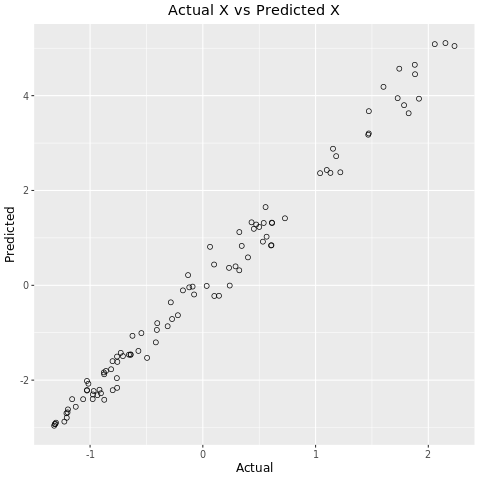

In [31]:
[rgraph| 
    pc1 = exportFrame$x
    pc2 = exportFrame$y
    actual = exportFrame$actX
    prediction = 0.6 * (pc2 - pc1)
    newFrame = data.frame (actual, prediction)
    
    ggplot(newFrame, aes(x=newFrame[,1], y=newFrame[,2])) + 
    ggtitle("Actual X vs Predicted X") +
    xlab("Actual") + ylab("Predicted") +
    geom_point(size=2, shape=21) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(text=element_text(family="Ariel", size=12)) |]